# 1) Виконання завдання із прикладу, отримання файлу із навченою моделлю для розпізнавання рукописних цифр. Тестування.

Завантажимо набір рукописних цифр з допомогою Keras

In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Напишемо функцію для перегляду перших n зображень та їх відповідних класів

In [2]:
import matplotlib.pyplot as plt

def display_n_images(images, labels, n):
    plt.figure(figsize=(10, 10))
    for i in range(n):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(labels[i])
    plt.show()

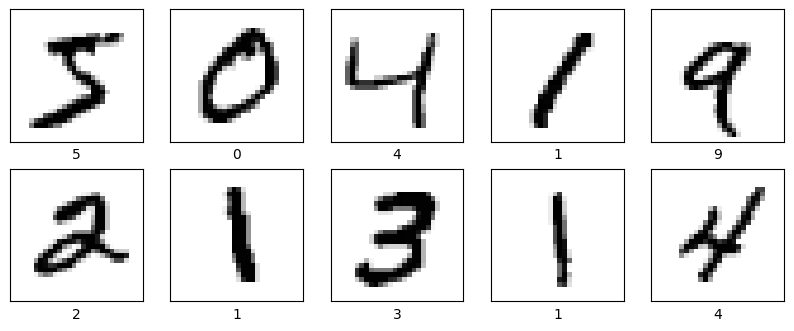

In [3]:
display_n_images(train_images,train_labels,10)

Перетворимо тривимірний масив у двовимірний (60000, 28 * 28)

In [4]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

Завантажимо масиви із відгуками на кожне тестове зображення

In [5]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Створимо модель

In [6]:
from keras import models
from keras import layers

# Визначення типу моделі
network = models.Sequential()

# Визначення прихованого шару
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))

# Визначення вихідного шару з функцією активації softmax
network.add(layers.Dense(10, activation='softmax'))

D:\anaconda_jup\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Використаємо таке поєднання цільової функції, оптимізатора та метрики та скомпілюємо мережу

In [7]:
network.compile(optimizer = 'rmsprop',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

<b>Навчання моделі</b>

Для навчання викличемо метод fit, який намагається адаптувати модель під навчальні дані. Адаптація відбувається у такий спосіб - тестові завдання пакетами (batch) фіксованого розміру batch_size подаються моделі, яка ітеративно підганяє вагові коефіцієнти відповідно до виставлених міток з файлу міток. Кожна ітерація називається епохою

In [8]:
network.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8697 - loss: 0.4447
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9650 - loss: 0.1189
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9784 - loss: 0.0714
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9855 - loss: 0.0496
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9892 - loss: 0.0371


На навчальних даних ми досягнули точності 0.9895

In [9]:
network.fit(train_images, train_labels, epochs = 6, batch_size = 128)

Epoch 1/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9927 - loss: 0.0261
Epoch 2/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9941 - loss: 0.0206
Epoch 3/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9954 - loss: 0.0160
Epoch 4/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9976 - loss: 0.0111
Epoch 5/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9980 - loss: 0.0088
Epoch 6/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9988 - loss: 0.0058


Поекспериментуємо з оптимізаторами, кількістю нейронів у прихованому шарі та кількістю епох

In [10]:
def create_model(optimizer, neurons):
    test_network = models.Sequential()
    
    # Визначення прихованого шару
    test_network.add(layers.Dense(neurons, activation='relu', input_shape=(28*28,)))
    
    # Визначення вихідного шару з функцією активації softmax
    test_network.add(layers.Dense(10, activation='softmax'))
    test_network.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return test_network

optimizers = ['rmsprop', 'sgd', 'Adagrad', 'Adadelta']
neurons_list = [256, 512, 1024]
epochs_list = [3, 5, 7]

for optimizer in optimizers:
    for neurons in neurons_list:
        for epochs in epochs_list:
            print(f"\nTraining model with optimizer: {optimizer}, neurons: {neurons}, epochs: {epochs}")
            model = create_model(optimizer=optimizer, neurons=neurons)
            model.fit(train_images, train_labels, epochs=epochs, batch_size=128)



Training model with optimizer: rmsprop, neurons: 256, epochs: 3
Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8659 - loss: 0.4806
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9588 - loss: 0.1412
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9740 - loss: 0.0902

Training model with optimizer: rmsprop, neurons: 256, epochs: 5
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8647 - loss: 0.4822
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9596 - loss: 0.1403
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9728 - loss: 0.0913
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9786 - loss: 0.0696
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9849 - loss: 0.0515

Training model with optimizer: rmsprop, neurons: 256, epochs: 7
Epoch 1/7
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8658 - loss: 0.4810
Epoch 2/7
469/469 ━━━━━━━━━━━━━━━━━━━━ 3

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4706 - loss: 1.9516
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8156 - loss: 1.0620
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8475 - loss: 0.7622
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8625 - loss: 0.6269
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8724 - loss: 0.5510

Training model with optimizer: Adagrad, neurons: 1024, epochs: 7
Epoch 1/7
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4712 - loss: 1.9327
Epoch 2/7
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8178 - loss: 1.0561
Epoch 3/7
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8475 - loss: 0.7530
Epoch 4/7
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8658 - loss: 0.6230
Epoch 5/7
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8717 - loss: 0.5510
Epoch 6/7
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8789 - loss: 0.4982

З отриманих результатів бачимо: 
        <li>Оптимальне число нейронів прихованого шару - 512, менше число дає недостатню точність, а більше - надто довго виконується</li>
        <li>Оптимальне число епох - 5, менше число дає недостатню точність, а більше число дає незначне покращення у точності, яке нівелюється часом виконання </li>
        <li>Оптимальний оптимізатор - rmsprop,  найгірший на заданому наборі даних - Adadelta</li>

<b>Перевірка моделі</b>

In [11]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9763 - loss: 0.0856


<b>Збереження моделі</b>

In [12]:
network.save('my_model.h5')

In [13]:
json_string = network.to_json()

In [14]:
network.save_weights('my_model.weights.h5')

# Завантаження моделі

In [15]:
from keras.models import load_model
model = load_model('my_model.h5')

У текстовому редакторі створимо зображення з рукописною цифрою та протестуємо роботу мережі

In [16]:
import cv2
import numpy as np

def preprocess_image(filename):
    img = 255 - cv2.imread(filename, 0) # Використовуємо змінну filename
    img = cv2.resize(img, (28, 28))  # Resize to 28x28 pixels
    img = img.reshape((1, 28 * 28))
    img = img.astype('float32') / 255
    return img

In [17]:
tst = preprocess_image('test_1.png')

In [18]:
pred = list(model.predict(tst)[0])
print(pred.index(max(pred)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1


In [19]:
tst = preprocess_image('test_5.png')

In [20]:
pred = list(model.predict(tst)[0])
print(pred.index(max(pred)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1


In [21]:
tst = preprocess_image('test_empty.png')

In [22]:
pred = list(model.predict(tst)[0])
print(pred.index(max(pred)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
5


Було проведено 3 експерименти. Модель правильно спрогнозувала лише одну цифру. У експериментах були застосовані різні кути нахилу цифр, та різну прозорість чисел. Це і могло спричинити такі помилки.

# 2) Спроектувати і розробити нейронну мережу на основі набору даних Cifar10 імплементованого у Keras

In [61]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [62]:
classes = ['airplane', 'automobile','bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
def first_n_images(images, labels, classes, n):
    plt.figure(figsize=(10, 10))
    for i in range(min(n, len(images))):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(classes[labels[i][0]])
    plt.show()

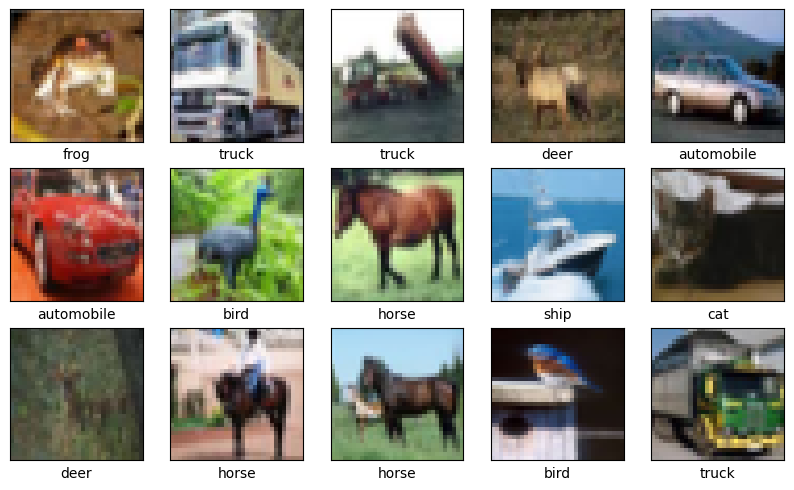

In [63]:
first_n_images(x_train, y_train, classes, n=15)

In [64]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
x_train = x_train / 255.0
x_test = x_test / 255.0 

Для задачі створимо згорткову нейронну мережу, детальний дослід взято зі статті:

<b>How to Develop a CNN From Scratch for CIFAR-10 Photo Classification</b> - https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/

In [65]:
from keras import models
from keras import layers

In [66]:
CNN = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(5, 5), activation='relu'),
    layers.MaxPooling2D((3, 3)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    
    layers.Flatten(),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=10, activation='softmax')
]) 

In [67]:
CNN.compile(optimizer = 'adam',
           loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])

In [68]:
CNN.fit(x_train,y_train,epochs = 15)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.3125 - loss: 1.8486
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5388 - loss: 1.2792
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5981 - loss: 1.1433
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6285 - loss: 1.0608
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6468 - loss: 0.9983
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6706 - loss: 0.9421
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6890 - loss: 0.8883
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6951 - loss: 0.8727
Epoch 9/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7051 - loss: 0.8399
Epoch 10/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7215 - loss: 0.7979
Epoch 11/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7268 - loss: 0.7810
Epoch 12/15
1563/1563

<b>Перевірка моделі</b>

In [69]:
test_loss, test_acc = CNN.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6608 - loss: 1.0200


In [32]:
def predict_and_show(image_path, CNN, classes):
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (32, 32))
    img_normalised = img_resized.astype('float32') / 255
    img_batch = np.expand_dims(img_normalised, axis=0)
    pred = CNN.predict(img_batch)
    predicted_class_index = np.argmax(pred[0])
    predicted_class = classes[predicted_class_index]
    confidence = pred[0][predicted_class_index]

    print("Predicted Class: ", predicted_class)
    print("Confidence: ", confidence)

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    ax1.imshow(img_rgb)
    ax1.set_title(f"Predicted Class: {predicted_class}, Confidence: {confidence:.2f}")
    ax1.axis('off')

    ax2.barh(np.arange(len(classes)), pred[0], align='center', alpha=0.5)
    ax2.set_yticks(np.arange(len(classes)))
    ax2.set_yticklabels(classes)
    ax2.set_xlabel('Probability')
    ax2.set_title('Class Probabilities')

    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Predicted Class:  truck
Confidence:  0.48348132


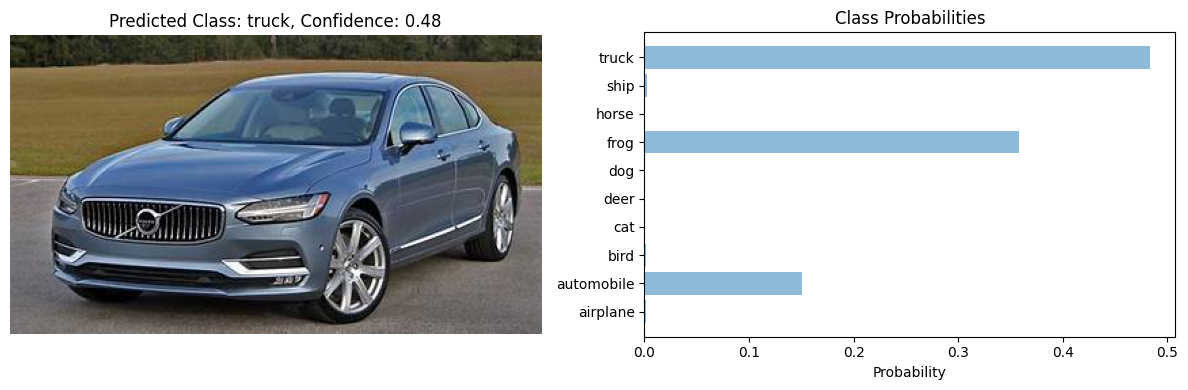

In [70]:
predict_and_show('automobile.jpg', CNN, classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted Class:  truck
Confidence:  0.9999702


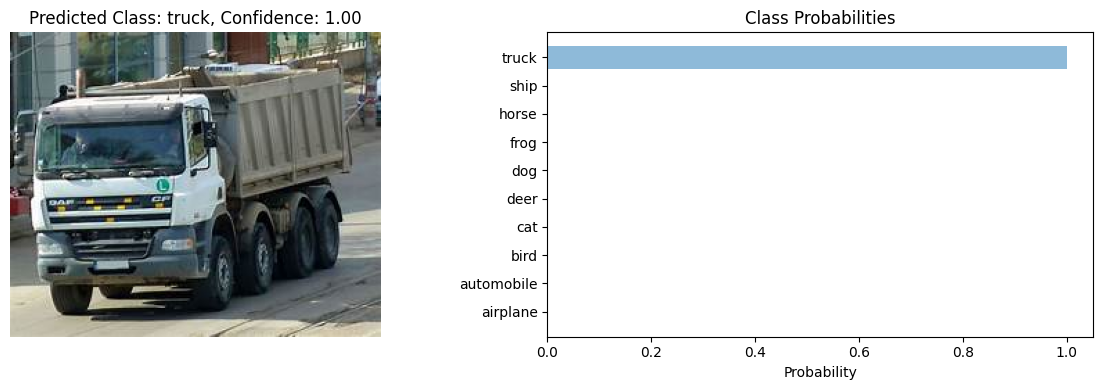

In [34]:
predict_and_show('truck.jpg', CNN, classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Class:  airplane
Confidence:  0.9656451


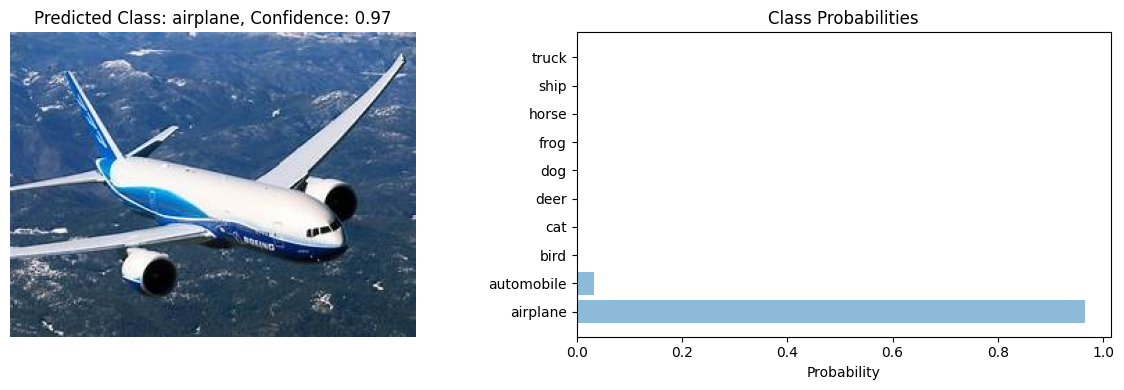

In [35]:
predict_and_show('airplane.jpg', CNN, classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted Class:  truck
Confidence:  0.28566888


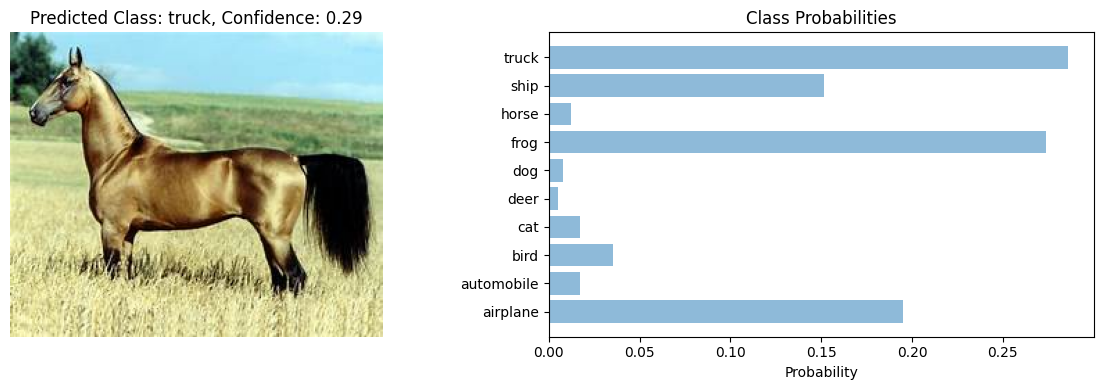

In [73]:
predict_and_show('horse.jpg', CNN, classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted Class:  horse
Confidence:  0.23890036


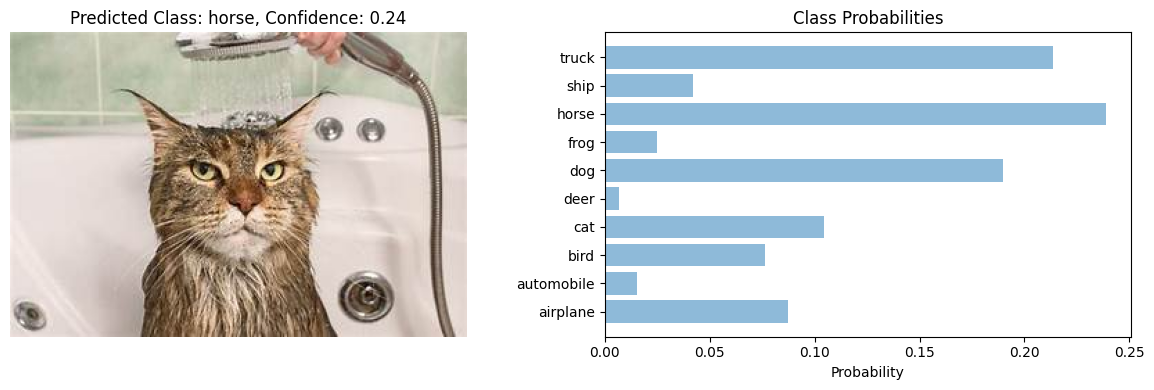

In [74]:
predict_and_show('cat.jpg', CNN, classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Class:  automobile
Confidence:  0.79289734


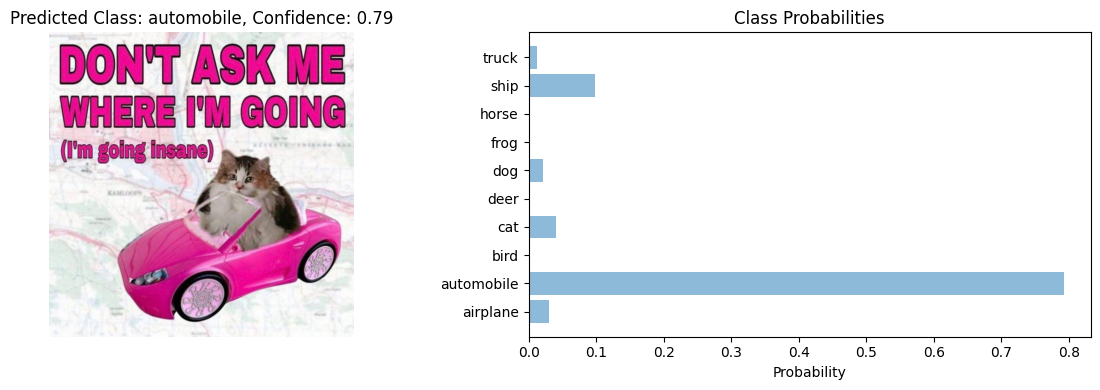

In [75]:
predict_and_show('test.jpg', CNN, classes)

# 3) Спроектувати і розробити нейронну мережу на основі набору даних FMNIST імплементованого у Keras

In [40]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
classes = ['T-shirt/top', 'Trouser', 'Pul/lover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [41]:
x_train.shape

(60000, 28, 28)

In [42]:
x_test.shape

(10000, 28, 28)

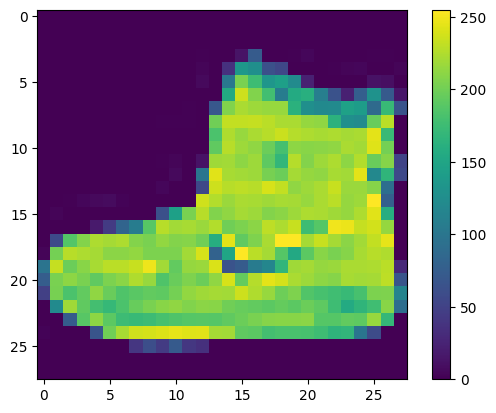

In [43]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()

In [44]:
x_train = x_train / 255.0
x_test = x_test / 255.0

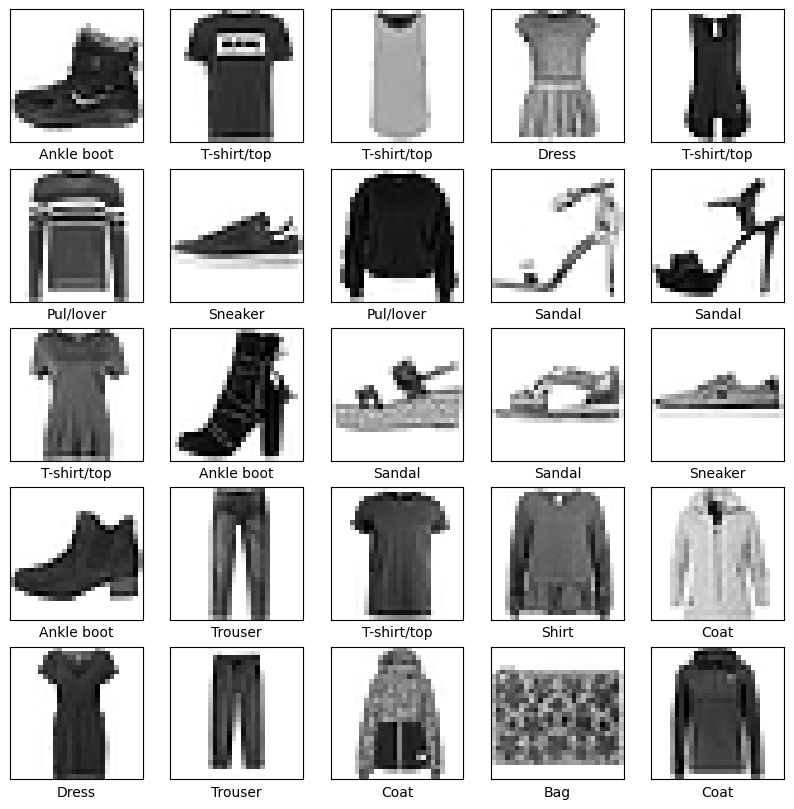

In [45]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap = plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

Проведемо випробування для різної кількості шарів

<b>3 шари</b>

In [46]:
model_3 = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128,activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_3.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])

results_3 = model_3.fit(x_train, y_train, epochs = 10)

D:\anaconda_jup\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7865 - loss: 0.6199
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8615 - loss: 0.3841
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8793 - loss: 0.3337
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8829 - loss: 0.3150
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8899 - loss: 0.3006
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8955 - loss: 0.2815
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9004 - loss: 0.2687
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9059 - loss: 0.2533
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9058 - loss: 0.2505
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9107 - loss: 0.2367


In [47]:
test_loss, test_acc = model_3.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8748 - loss: 0.3513


<b>6 шарів</b>

In [48]:
model_6 = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_6.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])

results_6 = model_6.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7718 - loss: 0.6477
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8594 - loss: 0.3814
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8758 - loss: 0.3347
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8826 - loss: 0.3184
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8940 - loss: 0.2911
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8943 - loss: 0.2791
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8993 - loss: 0.2739
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9028 - loss: 0.2595
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9055 - loss: 0.2485
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9103 - loss: 0.2393


In [49]:
test_loss, test_acc = model_6.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8770 - loss: 0.3511


Змінимо кількість нейронів у прихованих шарах

In [50]:
model_3_64 = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(64,activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_3_64.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])

results_3_64 = model_3_64.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7695 - loss: 0.6763
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8606 - loss: 0.3980
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8704 - loss: 0.3617
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8774 - loss: 0.3374
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8828 - loss: 0.3176
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8891 - loss: 0.2991
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8947 - loss: 0.2863
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8957 - loss: 0.2814
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8993 - loss: 0.2700
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9049 - loss: 0.2585


In [51]:
test_loss, test_acc = model_3_64.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8751 - loss: 0.3431


In [52]:
model_6_64= models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(64,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_6_64.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])

results_6_64 = model_6_64.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7506 - loss: 0.6964
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8550 - loss: 0.3948
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8699 - loss: 0.3538
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8803 - loss: 0.3255
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8834 - loss: 0.3121
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8890 - loss: 0.2966
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8934 - loss: 0.2869
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8985 - loss: 0.2747
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9012 - loss: 0.2606
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9048 - loss: 0.2537


In [53]:
test_loss, test_acc = model_6_64.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8806 - loss: 0.3350


З результатів бачимо, що оптимальною є модель з 64 нейронами у 1 прихованому шарі - <b>model_6_64</b>

In [54]:
pred = model_3_64.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


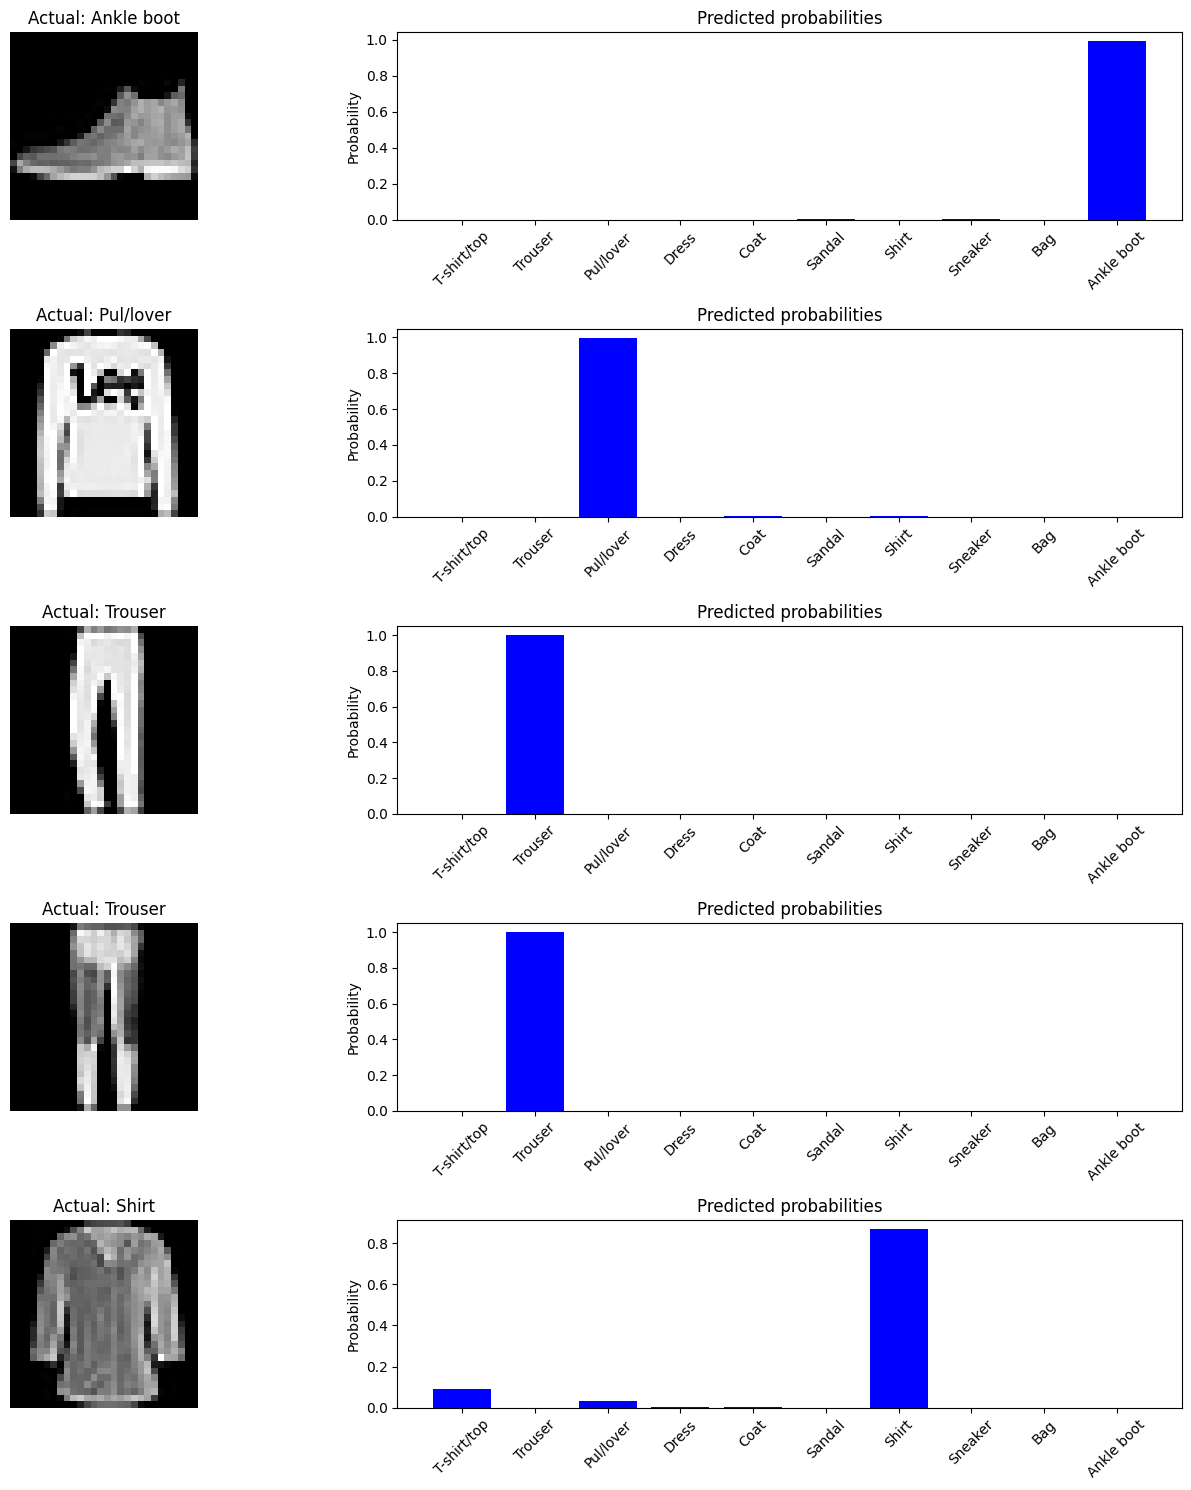

In [55]:
def display_images_with_predictions(x_test, y_test, pred, classes, num_images):
    plt.figure(figsize=(15, 3*num_images))
    for i in range(num_images):
        plt.subplot(num_images, 2, 2*i+1)
        plt.imshow(x_test[i], cmap='gray')
        plt.axis('off')
        plt.title(f'Actual: {classes[y_test[i]]}')
        
        plt.subplot(num_images, 2, 2*i+2)
        plt.bar(range(len(classes)), pred[i], color='blue')
        plt.xticks(range(len(classes)), classes, rotation=45)
        plt.ylabel('Probability')
        plt.title('Predicted probabilities')
        
    plt.tight_layout()
    plt.show()

display_images_with_predictions(x_test, y_test, pred, classes, 5)